In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../Train_knight.csv')
#df = pd.read_csv('../Test_knight.csv')

In [3]:
# Create a StandardScaler
scaler = MinMaxScaler()

# Select numeric columns to standarize
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Standarize data
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Combine dfs to recover knight column
if 'knight' in df.columns:
    df_normalized = pd.concat([df_scaled, df[['knight']]], axis=1)
else:
    df_normalized = df_scaled.copy()

In [4]:
print("Original data")
print(df.head())

Original data
   Sensitivity  Hability  Strength   Power  Agility  Dexterity  Awareness  \
0        11.80     17.26     75.26   431.9  0.09087    0.06232   0.028530   
1        19.81     22.15    130.00  1260.0  0.09831    0.10270   0.147900   
2        10.97     17.20     71.73   371.5  0.08915    0.11130   0.094570   
3        11.62     18.18     76.38   408.8  0.11750    0.14830   0.102000   
4        11.26     19.83     71.30   388.1  0.08511    0.04413   0.005067   

   Prescience  Reactivity  Midi-chlorien  ...  Evade   Stims  Sprint   Combo  \
0    0.016380      0.1847        0.06019  ...  24.49   86.00   562.0  0.1244   
1    0.094980      0.1582        0.05395  ...  30.88  186.80  2398.0  0.1512   
2    0.036130      0.1489        0.06640  ...  26.87   90.14   476.4  0.1391   
3    0.055640      0.1957        0.07255  ...  25.40   88.14   528.1  0.1780   
4    0.005664      0.1637        0.06343  ...  26.43   76.38   435.9  0.1108   

     Delay  Attunement  Empowered   Burst 

In [5]:
print("Standarized data")
print(df_normalized.head())
print()
print(df_normalized.describe())

Standarized data
   Sensitivity  Hability  Strength     Power   Agility  Dexterity  Awareness  \
0     0.228075  0.255326  0.217469  0.122333  0.339141   0.135019   0.066909   
1     0.607175  0.420697  0.595743  0.473595  0.439627   0.275247   0.346857   
2     0.188793  0.253297  0.193076  0.096713  0.315910   0.305112   0.221787   
3     0.219556  0.286439  0.225209  0.112534  0.698811   0.433602   0.239212   
4     0.202518  0.342239  0.190104  0.103754  0.261345   0.071850   0.011883   

   Prescience  Reactivity  Midi-chlorien  ...     Evade     Stims    Sprint  \
0    0.089852    0.397475       0.237907  ...  0.379604  0.177250  0.092607   
1    0.521009    0.263636       0.092791  ...  0.574125  0.679267  0.543846   
2    0.198190    0.216667       0.382326  ...  0.452055  0.197868  0.071569   
3    0.305211    0.453030       0.525349  ...  0.407306  0.187908  0.084275   
4    0.031070    0.291414       0.313256  ...  0.438661  0.129339  0.061615   

      Combo     Delay  Attu

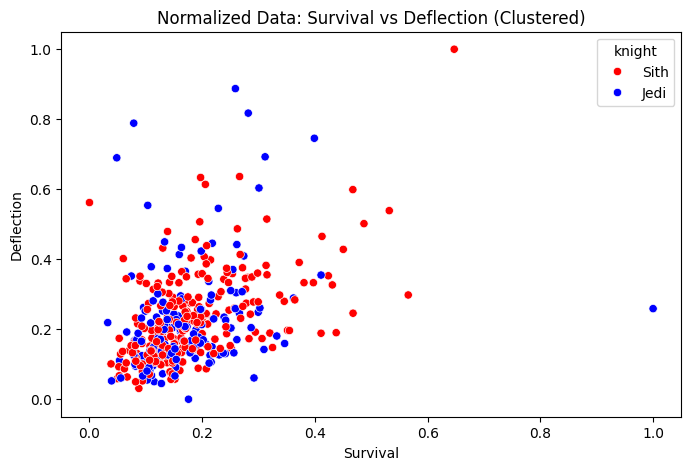

In [6]:
plt.figure(figsize=(8, 5))

if 'knight' in df.columns:
    sns.scatterplot(data=df_normalized, x='Survival', y='Deflection', hue='knight', palette={"Jedi": "blue", "Sith": "red"})
    plt.title('Normalized Data: Survival vs Deflection (Clustered)')
else:
    sns.scatterplot(data=df_normalized, x='Survival', y='Deflection', color='green', label='knight')
    plt.title('Normalized Data: Survival vs Deflection (Undifferentiated)')